In [1]:
import os, glob
import numpy as np
import ccdproc
import matplotlib
import matplotlib.pyplot as plt
import subprocess as sp
import pandas as pd
from astropy.nddata import CCDData
from astropy.io import ascii

In [2]:
saob_path = '/home/astro/Documenti/2023/2023-12-19/sao/SaoB_reduced/*.FIT'
saob_imgs = glob.glob(saob_path)
saob_imgs.sort()
saov_path = '/home/astro/Documenti/2023/2023-12-19/sao/SaoV_reduced/*.FIT'
saov_imgs = glob.glob(saov_path)
saov_imgs.sort()

In [3]:
os.chdir('/home/astro/Documenti/2023/2023-12-19/sao/SaoB_reduced/')
list_b = []
df_b = pd.DataFrame()
for element in saob_imgs:
    sp.run(['sex {} -c myconf.txt'.format(element)], shell=True, stderr = sp.DEVNULL)
    df3 = ascii.read('output.src')
    df4 = df3.to_pandas()
    list_b.append(df4)
list2_b = []
for element in list_b:
    for _, row_b in element.iterrows():
        if row_b['FLAGS'] == 0:
            list2_b.append(row_b)
list2_b = list2_b[0:7]
df_b = pd.concat(list2_b, axis = 1).transpose()
df_b = df_b[['MAG_APER', 'MAGERR_APER', 'X_IMAGE','Y_IMAGE']]
df_b['Name'] = saob_imgs
for i in range(0,7):
    df_b.iloc[i,-1] = df_b.iloc[i,-1].replace("/home/astro/Documenti/2023/2023-12-19/sao/SaoB_reduced/", '')
    df_b.iloc[i,-1] = df_b.iloc[i,-1].replace(".FIT", '')
    df_b.iloc[i,-1] = df_b.iloc[i,-1].replace("_", ' ')

In [4]:
air_mass = [1.20, 1.77, 3.55, 2.58, 2.92, 2.10, 1.00]
df_b['AIR_MASS'] = air_mass
mag_simb = [7.07, 6.43, 7.56, 6.258, 7.95,  4.770,  6.99]
df_b['MAG_SIMB'] = mag_simb
df_b['MAG_FINAL'] = df_b['MAG_APER'] - df_b['MAG_SIMB']
df_b

,MAG_APER,MAGERR_APER,X_IMAGE,Y_IMAGE,Name,AIR_MASS,MAG_SIMB,MAG_FINAL
31,5.5875,0.0028,1396.0005,1408.0933,SAO 128162 B.00000091,1.20,7.070,-1.4825
36,5.1585,0.0023,1978.6552,1708.3607,SAO 165522 B.00000094,1.77,6.430,-1.2715
35,7.1742,0.0076,2518.3416,1962.3417,SAO 190886 B.00000099,3.55,7.560,-0.3858
45,5.3591,0.0026,2345.3545,1887.3295,SAO 191144 B.00000098,2.58,6.258,-0.8989
60,7.1149,0.0073,2341.3174,1939.6466,SAO 191814 B.00000103,2.92,7.950,-0.8351
33,3.5608,0.0011,2083.6970,1838.9640,SAO 191988 B.00000095,2.10,4.770,-1.2092
27,5.3777,0.0025,1547.1042,1180.1252,SAO 73250 B.00000090,1.00,6.990,-1.6123


In [9]:
os.chdir('/home/astro/Documenti/2023/2023-12-19/sao/SaoV_reduced/')
list_v = []
list2_v = []
for element in saov_imgs:
    sp.run(['sex {} -c myconf.txt'.format(element)], shell=True, stderr = sp.DEVNULL)
    df1 = ascii.read("output.src")
    df2 = df1.to_pandas()
    list_v.append(df2)
df = pd.DataFrame()
dfmlist = []
for element in list_v:
    for _, row_v in element.iterrows():
        if row_v['FLAGS'] == 0:
            list2_v.append(row_v)
    df = pd.concat(list2_v, axis=1)
    df = df.transpose()
    dfm = df.loc[df['MAG_APER'].idxmin()]
    dfmlist.append(dfm)
    list2_v = []
df_v = pd.concat(dfmlist, axis=1).transpose()
df_v = df_v[['MAG_APER', 'MAGERR_APER', 'X_IMAGE','Y_IMAGE']]
df_v['Name'] = saov_imgs
for i in range(0,7):
    df_v.iloc[i,-1] = df_v.iloc[i,-1].replace("/home/astro/Documenti/2023/2023-12-19/sao/SaoV_reduced/", '')
    df_v.iloc[i,-1] = df_v.iloc[i,-1].replace(".FIT", '')
    df_v.iloc[i,-1] = df_v.iloc[i,-1].replace("_", ' ')

In [10]:
air_mass = [1.20, 1.77, 3.55, 2.58, 2.92, 2.10, 1.00]
df_v['AIR_MASS'] = air_mass
mag_simv = [7.17, 6.43, 7.58, 6.276,  7.73,  4.758, 7.01]
df_v['MAG_SIMV'] = mag_simv
df_v['MAG_FINAL'] = df_v['MAG_APER'] - df_v['MAG_SIMV']
df_v

,MAG_APER,MAGERR_APER,X_IMAGE,Y_IMAGE,Name,AIR_MASS,MAG_SIMV,MAG_FINAL
38,5.4599,0.0027,1381.1331,1401.6898,SAO 128162 V.00000092,1.20,7.170,-1.7101
37,4.8787,0.0021,1975.0400,1718.6324,SAO 165522 V.00000093,1.77,6.430,-1.5513
32,6.5118,0.0057,2515.0437,1952.0411,SAO 190886 V.00000100,3.55,7.580,-1.0682
48,4.9557,0.0022,2349.3779,1895.3770,SAO 191144 V.00000097,2.58,6.276,-1.3203
43,6.5469,0.0058,2397.8203,1971.3240,SAO 191814 V.00000101,2.92,7.730,-1.1831
36,3.1792,0.0009,2091.4231,1821.9325,SAO 191988 V.00000096,2.10,4.758,-1.5788
25,5.1674,0.0023,1552.1312,1200.5549,SAO 73250 V.00000089,1.00,7.010,-1.8426


#### LINEAR FIT AND PLOT

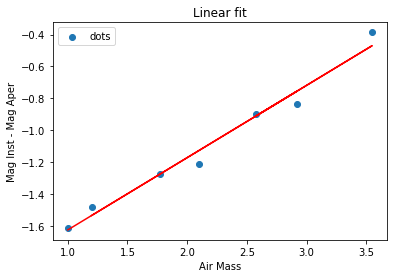

Extinction Coefficient = 0.45281444509688795
Extinction Coefficient error = 0.030157195895269478
m_0B = -2.07740777283785
Intersect error = 0.07004950660953829
Adj coef = 0.9890923767382649


In [7]:
coeficientes, matriz_cov = np.polyfit(df_b['AIR_MASS'], df_b['MAG_FINAL'], 1, cov = True)
coef_adj = np.corrcoef(df_b['AIR_MASS'], df_b['MAG_FINAL'])[0,1]
m_b,b_b = coeficientes


error_m_b = np.sqrt(matriz_cov[0,0])
error_b_b = np.sqrt(matriz_cov[1,1])

y_ajustada = m_b * df_b['AIR_MASS'] + b_b

plt.scatter(df_b['AIR_MASS'], df_b['MAG_FINAL'], label = 'dots')
plt.plot(np.array(df_b['AIR_MASS']), np.array(y_ajustada), color = 'red')
plt.xlabel('Air Mass')
plt.ylabel('Mag Inst - Mag Aper')
plt.legend()
plt.title('Linear fit')
plt.show()
print('Extinction Coefficient =',m_b)
print('Extinction Coefficient error =',error_m_b)
print('m_0B =',b_b)
print('Intersect error =',error_b_b)
print('Adj coef =',coef_adj)

#Extinction Coefficient = 0.45281444509688795
#Extinction Coefficient error = 0.030157195895269478
#m_0B = -2.07740777283785
#Intersect error = 0.07004950660953829
#Adj coef = 0.9890923767382649

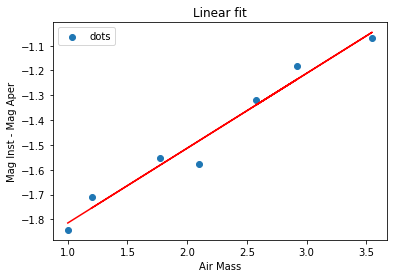

Extinction Coefficient = 0.30150068506557054
Extinction Coefficient error = 0.02540575622501868
m_0V = -2.116155765455919
Intersect error = 0.059012803935259976
Adj coef = 0.9827078972726345


In [8]:
coeficientes, matriz_cov = np.polyfit(df_v['AIR_MASS'], df_v['MAG_FINAL'], 1, cov = True)
coef_adj = np.corrcoef(df_v['AIR_MASS'], df_v['MAG_FINAL'])[0,1]
m_v,b_v = coeficientes


error_m_v = np.sqrt(matriz_cov[0,0])
error_b_v = np.sqrt(matriz_cov[1,1])

y_ajustada = m_v * df_v['AIR_MASS'] + b_v

plt.scatter(df_v['AIR_MASS'], df_v['MAG_FINAL'], label = 'dots')
plt.plot(np.array(df_b['AIR_MASS']), np.array(y_ajustada), color = 'red')
plt.xlabel('Air Mass')
plt.ylabel('Mag Inst - Mag Aper')
plt.legend()
plt.title('Linear fit')
plt.show()
print('Extinction Coefficient =',m_v)
print('Extinction Coefficient error =',error_m_v)
print('m_0V =',b_v)
print('Intersect error =',error_b_v)
print('Adj coef =',coef_adj)
#Extinction Coefficient = 0.30150068506557054
#Extinction Coefficient error = 0.02540575622501868
#m_0V = -2.116155765455919
#Intersect error = 0.059012803935259976
#Adj coef = 0.9827078972726345
